In [1]:
import os
os.getcwd()


'c:\\Users\\Basti\\OneDrive\\Desktop\\Master\\NOVA SBE\\S2\\T1\\Adpro\\group project\\Group_13'

In [2]:
os.chdir(r"C:\Users\Basti\OneDrive\Desktop\Master\NOVA SBE\S2\T1\Adpro\group project")

In [3]:
import pandas as pd

# Define column names for df_movie
movie_columns = [
    "Wikipedia_movie_ID", 
    "Freebase_movie_ID", 
    "Movie_name", 
    "Movie_release_date", 
    "Box_office_revenue", 
    "Runtime", 
    "Languages", 
    "Countries", 
    "Genres"
]

# Define column names for df_character
character_columns = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_release_date",
    "Character_name",
    "Actor_date_of_birth",
    "Actor_gender",
    "Actor_height_meters",
    "Actor_ethnicity",
    "Actor_name",
    "Actor_age_at_release",
    "Freebase_character_actor_map_ID",
    "Freebase_character_ID",
    "Freebase_actor_ID"
]

# Read both datasets with proper column names
df_movie = pd.read_csv("movie.metadata.tsv", delimiter="\t", header=None, names=movie_columns)
df_character = pd.read_csv("character.metadata.tsv", delimiter="\t", header=None, names=character_columns)

# Display the first few rows of each DataFrame to confirm changes
print("Movies DataFrame:")
display(df_movie.head())

print("Characters DataFrame:")
display(df_character.head())



Movies DataFrame:


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Box_office_revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


Characters DataFrame:


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_meters,Actor_ethnicity,Actor_name,Actor_age_at_release,Freebase_character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


You are going to build a **[Streamlit app](https://streamlit.io/)** that will showcase your analysis.  
Keep all the .py and .ipynb out of the main directory. The only files in the main directory of the project should be the **files necessary to launch the app** and the several configuration files (.yml, .gitignore, and others). Everything else should have their own directories, like downloaded content.


### Day 1


In [4]:
import os
import tarfile
import requests
import pandas as pd
import ast  # Required for safely converting string dictionaries to Python dictionaries
from collections import Counter  # Required for counting occurrences in a list
import matplotlib.pyplot as plt
from pydantic import BaseModel, Field, model_validator


class MovieData(BaseModel):
    """
    A class to handle the automated downloading, extraction,
    and loading of movie-related datasets.

    Attributes
    ----------
    url : str
        URL to download the dataset.
    download_path : str
        Directory where the downloaded file will be stored.
    extract_path : str
        Directory where extracted files will be placed.
    movie_df : pd.DataFrame or None
        DataFrame containing movie metadata.
    character_df : pd.DataFrame or None
        DataFrame containing character metadata.
    """

    url: str = Field(..., description="URL of the dataset")
    download_path: str = Field(
        default="downloads/", description="Directory for the downloaded file"
    )
    extract_path: str = Field(
        default="downloads/MovieSummaries/", description="Directory for extracted files"
    )
    movie_df: pd.DataFrame = None
    character_df: pd.DataFrame = None
    plot_summaries: pd.DataFrame = None

    model_config = {
        "arbitrary_types_allowed": True  # Allows Pandas DataFrames within Pydantic models
    }

    @model_validator(mode="after")
    def setup(self) -> "MovieData":
        """
        Handles the downloading, extraction, and loading of datasets.

        This method checks if the dataset is already downloaded, extracts it if necessary,
        and then loads the relevant files into Pandas DataFrames.

        Returns
        -------
        MovieData
            The instance of the MovieData class with the datasets loaded.

        Raises
        ------
        FileNotFoundError
            If the expected dataset files are missing after extraction.
        """
        os.makedirs(self.download_path, exist_ok=True)
        filename = os.path.join(self.download_path, "MovieSummaries.tar.gz")

        # Download the dataset if it does not exist locally
        if not os.path.exists(filename):
            self._download_file(self.url, filename)
        else:
            print("Dataset already downloaded.")

        # Extract the dataset if it has not been extracted yet
        if not os.path.exists(self.extract_path):
            self._extract_file(filename, self.download_path)
        else:
            print("Dataset already extracted.")

        # Load the datasets into Pandas DataFrames
        self._load_dataframes()

        return self

    def _download_file(self, url: str, filename: str) -> None:
        """
        Downloads a file from the given URL and saves it locally.

        Parameters
        ----------
        url : str
            The URL from which to download the dataset.
        filename : str
            The local path where the downloaded file will be stored.
        """
        print(f"Downloading dataset from {url}...")
        response = requests.get(url, stream=True)
        with open(filename, "wb") as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print("Download complete.")

    def _extract_file(self, filepath: str, extract_to: str) -> None:
        """
        Extracts a compressed tar.gz file to a specified directory.

        Parameters
        ----------
        filepath : str
            The path to the compressed file.
        extract_to : str
            The directory where the extracted files will be placed.
        """
        print("Extracting dataset...")
        with tarfile.open(filepath, "r:gz") as tar:
            tar.extractall(extract_to)
        print("Extraction complete.")

    def _load_dataframes(self) -> None:
        """
        Loads the extracted TSV dataset files into Pandas DataFrames.

        Raises
        ------
        FileNotFoundError
            If any of the required dataset files are missing.
        """
        movie_file = os.path.join(self.extract_path, "movie.metadata.tsv")
        character_file = os.path.join(self.extract_path, "character.metadata.tsv")
        plot_file = os.path.join(self.extract_path, "plot_summaries.txt")

        if os.path.exists(movie_file) and os.path.exists(character_file):
            self.movie_df = pd.read_csv(
                movie_file,
                sep="\t",
                names=[
                    "wikipedia_movie_id",
                    "freebase_movie_id",
                    "title",
                    "release_date",
                    "box_office_revenue",
                    "runtime_min",
                    "languages",
                    "countries",
                    "genres",
                ],
                header=None,
            )

            self.character_df = pd.read_csv(
                character_file,
                sep="\t",
                names=[
                    "wikipedia_movie_id",
                    "freebase_movie_id",
                    "movie_release_date",
                    "character_name",
                    "actor_date_of_birth",
                    "actor_gender",
                    "actor_height_in_meters",
                    "actor_ethnicity_freebase_id",
                    "actor_name",
                    "actor_age_at_movie_release",
                    "freebase_character_or_actor_map_id",
                    "freebase_character_id",
                    "freebase_actor_id",
                ],
                header=None,
            )
            self.plot_summaries = pd.read_csv(
                plot_file,
                sep="\t",
                names=[
                    "wikipedia_movie_id",
                    "plot_summary"
                ],
                header=None,
            )

            print("Datasets loaded successfully.")
        else:
            raise FileNotFoundError(
                "One or more dataset files are missing. Check extraction."
            )

    def movie_type(self, N: int = 10) -> pd.DataFrame:
        """
        Identifies the top N most common movie genres.

        Parameters:
        ----------
        N : int, optional
            The number of most common movie genres to return (default is 10).

        Returns:
        -------
        pd.DataFrame
            A DataFrame with two columns:
            - 'Movie_Type': Genre name.
            - 'Count': Number of occurrences of each genre.

        Raises:
        ------
        TypeError: If N is not an integer.
        ValueError: If the dataset is not loaded.
        """

        # Ensure that N is an integer
        if not isinstance(N, int):
            raise TypeError("N must be an integer.")

        # Ensure that the dataset has been loaded
        if self.movie_df is None:
            raise ValueError("Dataset not loaded.")

        # Convert genre column from string format to dictionary format
        self.movie_df["genres"] = self.movie_df["genres"].apply(ast.literal_eval)

        # Extract all genres from the dictionary and flatten into a single list
        all_genres = [
            genre
            for sublist in self.movie_df["genres"].apply(lambda x: list(x.values()))
            for genre in sublist
        ]

        # Count the occurrences of each genre
        genre_counts = Counter(all_genres)

        # Get the N most common genres
        most_common_genres = genre_counts.most_common(N)

        # Return the results as a Pandas DataFrame
        return pd.DataFrame(most_common_genres, columns=["Movie_Type", "Count"])

    def actor_count(self) -> pd.DataFrame:
        """
        Computes a histogram showing the number of actors per movie.

        Returns:
        -------
        pd.DataFrame
            A DataFrame with two columns:
            - 'Number_of_Actors': Number of actors in a movie.
            - 'Movie_Count': Number of movies that have that many actors.

        Raises:
        ------
        ValueError: If the dataset is not loaded.
        """

        # Ensure that the dataset has been loaded
        if self.character_df is None:
            raise ValueError("Dataset not loaded.")

        # Group by 'wikipedia_movie_id' to count the number of unique actors per movie
        movie_actor_counts = (
            self.character_df.groupby("wikipedia_movie_id")["actor_name"]
            .nunique()
            .reset_index()
        )

        # Rename columns for clarity
        movie_actor_counts.columns = ["wikipedia_movie_id", "Number_of_Actors"]

        # Count how many movies have the same number of actors
        actor_count_histogram = (
            movie_actor_counts["Number_of_Actors"].value_counts().reset_index()
        )

        # Rename columns for clarity
        actor_count_histogram.columns = ["Number_of_Actors", "Movie_Count"]

        # Sort values by the number of actors for better readability
        actor_count_histogram = actor_count_histogram.sort_values(
            by="Number_of_Actors"
        ).reset_index(drop=True)

        return actor_count_histogram

    def actor_distributions(
        self, gender: str, min_height: float, max_height: float, plot: bool = False
    ) -> pd.DataFrame:
        """
        Filters actors based on gender and height and optionally plots the height distribution.

        Parameters:
        ----------
        gender : str
            The gender to filter by. Accepts "All" or specific values from the dataset.
        min_height : float
            The minimum height (in meters) to include in the filtered dataset.
        max_height : float
            The maximum height (in meters) to include in the filtered dataset.
        plot : bool, optional
            If True, displays a histogram of actor heights (default is False).

        Returns:
        -------
        pd.DataFrame
            A filtered DataFrame with actor names, genders, and heights.

        Raises:
        ------
        TypeError: If gender is not a string or if height values are not numerical.
        ValueError: If min_height is greater than max_height.
        ValueError: If the dataset is not loaded.
        """

        # Ensure that gender is a string
        if not isinstance(gender, str):
            raise TypeError("Gender must be a string.")

        # Ensure that height values are numerical
        if not isinstance(min_height, (int, float)) or not isinstance(
            max_height, (int, float)
        ):
            raise TypeError("Height values must be numerical.")

        # Ensure that min_height is not greater than max_height
        if min_height > max_height:
            raise ValueError("min_height must be less than max_height.")

        # Ensure that the dataset has been loaded
        if self.character_df is None:
            raise ValueError("Dataset not loaded.")

        # Get the list of valid genders from the dataset
        valid_genders = ["All"] + self.character_df[
            "actor_gender"
        ].dropna().unique().tolist()

        # Validate the provided gender input
        if gender not in valid_genders:
            raise ValueError(f"Invalid gender. Accepted values: {valid_genders}")

        # Filter dataset by gender (or keep all genders if "All" is selected)
        filtered_data = (
            self.character_df
            if gender == "All"
            else self.character_df[self.character_df["actor_gender"] == gender]
        )

        # Filter dataset by height range
        filtered_data = filtered_data[
            (filtered_data["actor_height_in_meters"] >= min_height)
            & (filtered_data["actor_height_in_meters"] <= max_height)
        ]

        # If the plot parameter is True, generate a histogram of actor heights
        if plot:
            plt.figure(figsize=(10, 6))
            plt.hist(
                filtered_data["actor_height_in_meters"].dropna(),
                bins=30,
                color="blue",
                edgecolor="black",
            )
            plt.title(f"Height Distribution for Gender: {gender}")
            plt.xlabel("Height (meters)")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()

        return filtered_data[["actor_name", "actor_gender", "actor_height_in_meters"]]

    def releases(self, genre: str = None) -> pd.DataFrame:
        """
        Computes the number of movies released per year, optionally filtered by genre.

        Args:
            genre (str, optional): A specific genre to filter movies by. Defaults to None.

        Returns:
            pd.DataFrame: A DataFrame containing the number of movies released per year.

        Raises:
            ValueError: If the dataset is not loaded or if an invalid genre is provided.
        """

        # Ensure the dataset is loaded
        if self.movie_df is None:
            raise ValueError("Dataset not loaded.")

        # Remove rows with missing release dates
        self.movie_df = self.movie_df.dropna(subset=["release_date"])

        # Extract the release year as a string and take only the first 4 characters
        self.movie_df["release_year"] = self.movie_df["release_date"].astype(str).str[:4]

        # Process genre filtering if a genre is provided
        if genre:
            # Convert genre strings into actual Python lists (from string representations)
            self.movie_df["genres"] = self.movie_df["genres"].apply(ast.literal_eval)

            # Extract all unique genre names from the dataset
            all_genres = set(
                genre_name
                for genre_list in self.movie_df["genres"].apply(lambda x: [d["name"] for d in x])
                for genre_name in genre_list
            )

            # Validate that the given genre exists in the dataset
            if genre not in all_genres:
                raise ValueError(f"Invalid genre. Choose from: {sorted(all_genres)}")

            # Create a boolean column to filter movies containing the specified genre
            self.movie_df["is_genre_match"] = self.movie_df["genres"].apply(
                lambda x: any(d["name"] == genre for d in x)
            )

            # Filter dataset to only include movies that match the specified genre
            filtered_df = self.movie_df[self.movie_df["is_genre_match"]]
        else:
            filtered_df = self.movie_df

        # Count the number of movies released per year
        release_counts = (
            filtered_df.groupby("release_year")
            .size()
            .reset_index(name="Movie_Count")
        )

        # Ensure the release_year column is an integer for sorting purposes
        release_counts["release_year"] = release_counts["release_year"].astype(int)

        # Sort by release year and reset index
        release_counts = release_counts.sort_values(by="release_year").reset_index(drop=True)

        return release_counts

    def ages(self, unit: str = "Y") -> pd.DataFrame:
        """
        Computes the number of actor births per year or month.

        Parameters:
        ----------
        unit : str, optional
            'Y' (default) computes births per year.
            'M' computes births per month.
            If any other value is given, defaults to 'Y'.

        Returns:
        -------
        pd.DataFrame
            A DataFrame with two columns:
            - 'Year' / 'Month': The birth year or birth month.
            - 'Birth_Count': Number of actors born in that year or month.
        """

        if self.character_df is None:
            raise ValueError("Dataset not loaded.")

        # Drop rows where the birth date is missing
        self.character_df = self.character_df.dropna(subset=["actor_date_of_birth"])

        # Extract Year and Month
        self.character_df["birth_year"] = (
            self.character_df["actor_date_of_birth"].astype(str).str[:4]
        )
        self.character_df["birth_month"] = (
            self.character_df["actor_date_of_birth"].astype(str).str[5:7]
        )

        # Ensure unit is valid
        if unit not in ["Y", "M"]:
            unit = "Y"

        if unit == "Y":
            birth_counts = (
                self.character_df.groupby("birth_year")
                .size()
                .reset_index(name="Birth_Count")
            )
            birth_counts = birth_counts[
                birth_counts["birth_year"].str.isnumeric()
            ]  # Remove non-numeric years
            birth_counts["birth_year"] = birth_counts["birth_year"].astype(int)
            birth_counts = birth_counts.sort_values(by="birth_year").reset_index(
                drop=True
            )
            birth_counts.rename(columns={"birth_year": "Year"}, inplace=True)
        else:
            # Remove empty birth months before conversion
            self.character_df = self.character_df[
                self.character_df["birth_month"].str.strip() != ""
            ]

            # Convert birth_month to int and group by month
            birth_counts = (
                self.character_df.groupby("birth_month")
                .size()
                .reset_index(name="Birth_Count")
            )
            birth_counts["birth_month"] = birth_counts["birth_month"].astype(int)
            birth_counts = birth_counts.sort_values(by="birth_month").reset_index(
                drop=True
            )
            birth_counts.rename(columns={"birth_month": "Month"}, inplace=True)

        return birth_counts


# Example usage
url = "http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz"
movie_data = MovieData(url=url)


print(movie_data.movie_type(5))
print(movie_data.actor_count())
print(movie_data.actor_distributions("M", 1.50, 1.80))
print(movie_data.releases())
print(movie_data.ages())

Dataset already downloaded.
Dataset already extracted.
Datasets loaded successfully.
        Movie_Type  Count
0            Drama  34007
1           Comedy  16349
2     Romance Film  10234
3  Black-and-white   9094
4           Action   8798
    Number_of_Actors  Movie_Count
0                  0           72
1                  1         8921
2                  2         6699
3                  3         5874
4                  4         5159
..               ...          ...
63                72            1
64                78            1
65                81            1
66                87            1
67               115            1

[68 rows x 2 columns]
             actor_name actor_gender  actor_height_in_meters
2              Ice Cube            M                   1.727
3         Jason Statham            M                   1.750
12          Peter Jason            M                   1.800
40          John Hawkes            M                   1.780
54          Dian Bachar

In [5]:
import streamlit

In [6]:
import os
os.chdir(r"C:\Users\Basti\OneDrive\Desktop\Master\NOVA SBE\S2\T1\Adpro\group project\Group_13")

2025-03-16 16:52:22.684 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-16 16:52:22.687 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-16 16:52:22.689 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:23.149 
  command:

    streamlit run c:\Users\Basti\anaconda3\envs\Adpro\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-16 16:52:23.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:23.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Dataset already downloaded.
Dataset already extracted.


2025-03-16 16:52:23.663 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:23.667 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Datasets loaded successfully.


2025-03-16 16:52:26.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:26.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:26.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:26.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:26.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:26.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:26.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 16:52:26.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

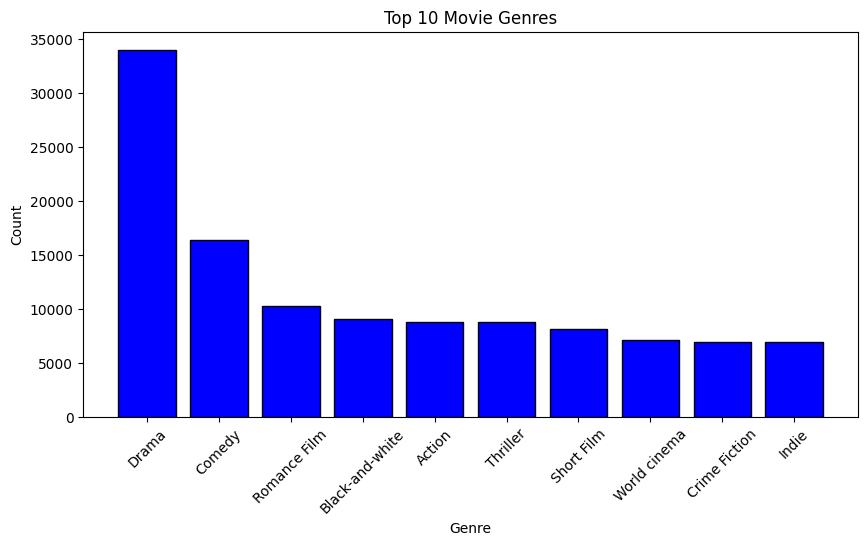

In [7]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from Class_MovieData import MovieData  # Ensure the class is in a separate file named movie_data.py

# Load Data and Initialize Class
@st.cache_data
def load_data():
    url = "http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz"
    return MovieData(url=url)

movie_data = load_data()

# Sidebar Navigation
st.sidebar.title("Movie Data Analysis")
selected_analysis = st.sidebar.radio(
    "Choose Analysis:",
    ["Movie Type Distribution", "Actor Count", "Actor Height Distribution", "Movie Releases Per Year", "Actor Births"]
)

# Movie Type Distribution
if selected_analysis == "Movie Type Distribution":
    st.header("Top Movie Genres")
    N = st.slider("Select Top N Genres", min_value=5, max_value=50, value=10)
    
    genre_data = movie_data.movie_type(N)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(genre_data["Movie_Type"], genre_data["Count"], color="blue", edgecolor="black")
    ax.set_title(f"Top {N} Movie Genres")
    ax.set_ylabel("Count")
    ax.set_xlabel("Genre")
    ax.set_xticklabels(genre_data["Movie_Type"], rotation=45)
    
    st.pyplot(fig)

# Actor Count Histogram
elif selected_analysis == "Actor Count":
    st.header("Number of Actors per Movie")
    
    actor_count_data = movie_data.actor_count()
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(actor_count_data["Number_of_Actors"], actor_count_data["Movie_Count"], color="green", edgecolor="black")
    ax.set_title("Distribution of Actor Count per Movie")
    ax.set_xlabel("Number of Actors")
    ax.set_ylabel("Number of Movies")
    
    st.pyplot(fig)

# Actor Height Distribution
elif selected_analysis == "Actor Height Distribution":
    st.header("Actor Height Distribution")

    # Gender selection
    gender_list = ["All"] + movie_data.character_df["actor_gender"].dropna().unique().tolist()
    gender = st.selectbox("Select Gender:", gender_list)

    # Height range input
    min_height = st.number_input("Min Height (meters):", min_value=0.5, max_value=2.5, value=1.5)
    max_height = st.number_input("Max Height (meters):", min_value=0.5, max_value=2.5, value=2.0)

    # Filter dataset
    filtered_data = movie_data.actor_distributions(gender, min_height, max_height, plot=False)

    # Plot histogram
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(filtered_data["actor_height_in_meters"], bins=20, color="purple", edgecolor="black")
    ax.set_title(f"Height Distribution for {gender}")
    ax.set_xlabel("Height (meters)")
    ax.set_ylabel("Frequency")
    
    st.pyplot(fig)
    
    st.write("Filtered Data:", filtered_data)

# Movie Releases Per Year
elif selected_analysis == "Movie Releases Per Year":
    st.header("Movie Releases Per Year")

    # Genre selection
    genre_list = ["All"] + sorted(set(movie_data.movie_df["genres"].dropna()))
    selected_genre = st.selectbox("Select Genre (Optional):", genre_list)
    
    if selected_genre == "All":
        releases_data = movie_data.releases()
    else:
        releases_data = movie_data.releases(selected_genre)

    # Plot line chart
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(releases_data["release_year"], releases_data["Movie_Count"], marker="o", linestyle="-", color="red")
    ax.set_title(f"Movie Releases Per Year ({selected_genre})")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Movies")
    
    st.pyplot(fig)

# Actor Birth Distribution
elif selected_analysis == "Actor Births":
    st.header("Actor Births")

    # Selection between Year and Month
    unit = st.radio("View Births By:", ["Year", "Month"])
    unit = "Y" if unit == "Year" else "M"
    
    birth_data = movie_data.ages(unit)

    fig, ax = plt.subplots(figsize=(10, 5))
    x_label = "Year" if unit == "Y" else "Month"
    ax.bar(birth_data[x_label], birth_data["Birth_Count"], color="orange", edgecolor="black")
    ax.set


In [8]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from movie_data_v2 import MovieData  # Ensure movie_data.py is in the same directory

# Initialize MovieData instance
url = "http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz"
movie_data = MovieData(url=url)

# Streamlit App Title
st.title("🎬 Movie Data Analysis App")

# Sidebar Section for User Inputs
st.sidebar.header("User Inputs")

# Input for `movie_type` method
N = st.sidebar.number_input("Select number of top genres (N):", min_value=1, max_value=50, value=10, step=1)

# Dropdown for `actor_distributions` gender selection
valid_genders = ["All"] + movie_data.character_df["actor_gender"].dropna().unique().tolist()
selected_gender = st.sidebar.selectbox("Select Gender:", valid_genders)

# Inputs for height range
min_height = st.sidebar.number_input("Minimum Height (meters):", min_value=0.5, max_value=3.0, value=1.5, step=0.1)
max_height = st.sidebar.number_input("Maximum Height (meters):", min_value=0.5, max_value=3.0, value=2.0, step=0.1)

# Ensure min_height is not greater than max_height
if min_height > max_height:
    st.sidebar.error("⚠️ Minimum height must be less than maximum height.")

# ---- PLOTS ----
st.subheader("📊 Movie Genre Distribution")
# Fetch data from movie_type method
movie_genres_df = movie_data.movie_type(N=N)

# Plot histogram of movie types
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(movie_genres_df["Movie_Type"], movie_genres_df["Count"], color="skyblue")
ax.set_xlabel("Count")
ax.set_ylabel("Movie Genre")
ax.set_title(f"Top {N} Most Common Movie Genres")
st.pyplot(fig)

# ---- Plot for `actor_count` method ----
st.subheader("🎭 Actor Count Per Movie")

actor_count_df = movie_data.actor_count()

fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.bar(actor_count_df["Number_of_Actors"], actor_count_df["Movie_Count"], color="salmon")
ax2.set_xlabel("Number of Actors")
ax2.set_ylabel("Movie Count")
ax2.set_title("Distribution of Number of Actors Per Movie")
st.pyplot(fig2)

# ---- Plot for `actor_distributions` method ----
st.subheader(f"📈 Actor Height Distribution for {selected_gender}")

actor_height_df = movie_data.actor_distributions(
    gender=selected_gender, min_height=min_height, max_height=max_height
)

fig3, ax3 = plt.subplots(figsize=(10, 5))
ax3.hist(actor_height_df["actor_height_in_meters"].dropna(), bins=30, color="green", edgecolor="black")
ax3.set_xlabel("Height (meters)")
ax3.set_ylabel("Frequency")
ax3.set_title(f"Height Distribution for {selected_gender}")
st.pyplot(fig3)

# Code for the LLM Part: 
import random
from ollama import chat, ChatResponse

# Create an instance of MovieDataset
test_instance = MovieData(url=url)

# Set page configuration
st.set_page_config(page_title="Random Movie Information", page_icon="🎬", layout="wide")

# Streamlit page title
st.title("Random Movie Information")

# Filter movies with existing summaries and genres
valid_movies = test_instance.movie_metadata[
    (test_instance.movie_metadata["wiki_movie_id"].isin(test_instance.plot_summaries["wiki_movie_id"])) &
    (test_instance.movie_metadata["genres"].notna())
]

# Shuffle button
if st.button("Shuffle"):
    # Ensure there are valid movies to choose from
    if valid_movies.empty:
        st.error("No movies with summaries and genres available.")
    else:
        # Select a random movie from the filtered list
        random_index = random.randint(0, len(valid_movies) - 1)
        movie = valid_movies.iloc[random_index]
        movie_id = movie["wiki_movie_id"]
        
        # Get the movie title and summary
        movie_title = movie["movie_name"]
        plot_summary_row = test_instance.plot_summaries[test_instance.plot_summaries["wiki_movie_id"] == movie_id]
        
        if not plot_summary_row.empty:
            movie_summary = plot_summary_row["plot_summary"].values[0]
        else:
            movie_summary = "Summary not available."
        
        # Get the movie genres
        movie_genres = eval(movie["genres"]).values()
        
        # Display the information in text boxes
        st.markdown(f"### {movie_title}\n\n{movie_summary}")
        st.text_area("Genres", ", ".join(movie_genres))
        
        # Use local LLM to classify the genre
        response: ChatResponse = chat(model='mistral', messages=[
            {
                'role': 'user',
                'content': f'Classify the following movie summary into genres: {movie_summary}. Only list the genres, separated by commas. Do not include any additional information or brackets.',
            },
        ])
        
        # Extract and display the genre classification
        llm_genres = response.message.content.strip()
        st.text_area("Genre by LLM", llm_genres)
        
        # Normalize and compare genres
        identified_genres = set([genre.strip().lower() for genre in llm_genres.split(",")])
        database_genres = set([genre.strip().lower() for genre in movie_genres])
        
        matching_genres = identified_genres.intersection(database_genres)
        
        if matching_genres:
            st.markdown("### Successfully Detected Genres")
            st.markdown(", ".join(matching_genres))
        
        if identified_genres.issubset(database_genres):
            st.success("The genres identified by the LLM are contained in the database genres.")
        else:
            st.warning("The genres identified by the LLM are not fully contained in the database genres.")
        
        # Visualization of the score
        genre_counts = {
            "Database Genres": len(database_genres),
            "LLM Genres": len(identified_genres),
            "Matching Genres": len(matching_genres)
        }
        
        fig, ax = plt.subplots()
        ax.bar(genre_counts.keys(), genre_counts.values(), color=["skyblue", "lightcoral", "lightgreen"])
        ax.set_ylabel("Count")
        ax.set_title("Genre Detection Score")
        st.pyplot(fig)


Dataset already downloaded.
Dataset already extracted.
Datasets loaded successfully.
Dataset already downloaded.
Dataset already extracted.


2025-03-16 17:39:21.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:21.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:21.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:21.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:21.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:21.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:21.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:21.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Datasets loaded successfully.


2025-03-16 17:39:22.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:23.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:23.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:23.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:23.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:23.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:23.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:23.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Dataset already downloaded.
Dataset already extracted.


2025-03-16 17:39:26.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:26.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:39:26.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Datasets loaded successfully.


AttributeError: 'MovieData' object has no attribute 'movie_metadata'

In [9]:
import streamlit as st
from Class_MovieData import MovieData

# Set up Streamlit app
st.set_page_config(page_title="Movie Data Analysis", layout="wide")

# Sidebar Navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Main Page", "Chronology", "Classification"])

# Load MovieData class
@st.cache_data
def load_movie_data():
    url = "http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz"
    return MovieData(url=url)

movie_data = load_movie_data()

# Import and load selected page
if page == "Main Page":
    from pages.main_page import main_page
    main_page(movie_data)
elif page == "Chronology":
    from pages.chronology import chronology
    chronology(movie_data)
elif page == "Classification":
    from pages.classification import classification
    classification(movie_data)


2025-03-16 17:55:55.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:55.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:55.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:55.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:55.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:55.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:55.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:55.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Dataset already downloaded.
Dataset already extracted.


2025-03-16 17:55:56.114 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:56.136 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Datasets loaded successfully.


2025-03-16 17:55:59.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 17:55:59.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


ModuleNotFoundError: No module named 'pages.main_page'